<a href="https://colab.research.google.com/github/AlejandroJuarez98/MLEARNING20/blob/master/CL06_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Algoritmo K-MEANS**
Es un algoritmo de agrupación de datos y es una herramienta útil para descubrir grupos dentro de un conjunto de datos.

- A partir de un diagrama de dispersión (x, y) podemos identificar pequeños grupos de observaciones. En donde podemos proceder con los siguientes pasos:
> - Elegir un número **n** de grupos. (Ejemplo n = 2)
> - Seleccionar al azar **n** puntos llamados centroides.
> - Asignar cada punto de datos al centroide más cercano. Los cuales forman k grupos.
> - Calcular y colocar el nuevo centroide de cada grupo.
> - Reasignar cada punto de datos al nievo centroide más cercano.

In [ ]:
# K-means (Importación de librerías)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/AlejandroJuarez98/MLEARNING20/master/mall-customer.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = dataset.iloc[:, [3, 4]].values

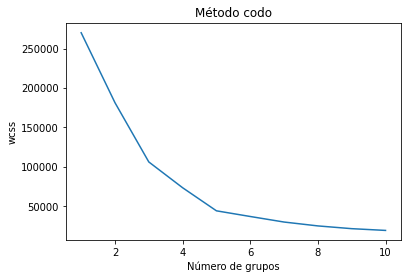

In [ ]:
# Encontrando número optimo de grupos
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11): 
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método codo') # Punto en el cual la información deja de cambiar bruscamente
plt.xlabel('Número de grupos')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(x)

print(y_means)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


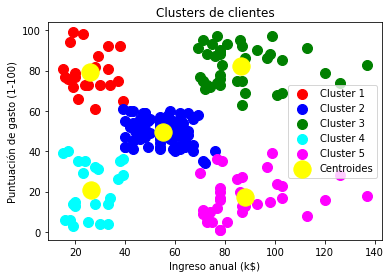

In [ ]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')

plt.title('Clusters de clientes')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Puntuación de gasto (1-100)')
plt.legend()
plt.show()